In [ ]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string

In [ ]:
TextBlob('I love Javascript').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
TextBlob('I hate the spaghetti code').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [ ]:
TextBlob('Odio el código spaguetti').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
TextBlob('Odio el código spaguetti').translate(from_lang='es', to='en').sentiment #fr, pt, it

Sentiment(polarity=-0.8, subjectivity=0.9)

Uso de TextBlob

In [ ]:
df = pd.read_csv('javascript.csv')
df.head(3)

,text
0,"Teniendo los conceptos básicos claros, impleme..."
1,"Si quieres aprender a programar, intenta apren..."
2,"Al final me compré la cartera de #JavaScript ,..."


In [ ]:
def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
df['clean_text']

0     Teniendo los conceptos básicos claros, impleme...
1     Si quieres aprender a programar, intenta apren...
2     Al final me compré la cartera de JavaScript , ...
3     🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...
4     Ya queda menos y needoc empieza a coger forma ...
                            ...                        
64    Cómo hacer un CRUD paso a paso sin necesitar u...
65    Código de JavaScript - Cuenta atras hasta una ...
66    Y recuerden colegas programadores con React, C...
67    Top story: Desarrollo web. JavaScript desde ce...
68    El método includes() determina si una matriz i...
Name: clean_text, Length: 69, dtype: object

In [ ]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
    if analysis.detect_language() == 'es':
      result = analysis.translate(from_lang = 'es', to = 'en').sentiment.polarity
      time.sleep(5)
      return result

In [ ]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [ ]:
df['polarity'].head(3)

0    0.266667
1    0.250000
2    0.000000
Name: polarity, dtype: float64

In [ ]:
df.head(3)

,text,clean_text,polarity
0,"Teniendo los conceptos básicos claros, impleme...","Teniendo los conceptos básicos claros, impleme...",0.266667
1,"Si quieres aprender a programar, intenta apren...","Si quieres aprender a programar, intenta apren...",0.250000
2,"Al final me compré la cartera de #JavaScript ,...","Al final me compré la cartera de JavaScript , ...",0.000000


In [ ]:
df[df.polarity < 0.3][['text', 'polarity']].head()

,text,polarity
0,"Teniendo los conceptos básicos claros, impleme...",0.266667
1,"Si quieres aprender a programar, intenta apren...",0.250000
2,"Al final me compré la cartera de #JavaScript ,...",0.000000
3,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,0.000000
4,Ya queda menos y #needoc empieza a coger forma...,-0.083333


In [ ]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [ ]:
df['result'] = df['polarity'].apply(x_range)

In [ ]:
df.head(3)

,text,clean_text,polarity,result
0,"Teniendo los conceptos básicos claros, impleme...","Teniendo los conceptos básicos claros, impleme...",0.266667,1
1,"Si quieres aprender a programar, intenta apren...","Si quieres aprender a programar, intenta apren...",0.250000,1
2,"Al final me compré la cartera de #JavaScript ,...","Al final me compré la cartera de JavaScript , ...",0.000000,0


In [ ]:
df['result'].value_counts()

 0    33
 1    23
-1    13
Name: result, dtype: int64

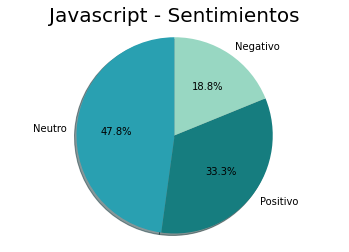

In [ ]:
import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['result'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Javascript - Sentimientos', fontsize = 20)
plt.axis('equal')
plt.show()

Nube de términos

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df.clean_text)
text

'Teniendo los conceptos básicos claros, implementando una lógica basada en las buenas prácticas y el entendimiento d…  Si quieres aprender a programar, intenta aprender primero los conceptos básicos y no apresurarte a manejar un Frame…  Al final me compré la cartera de JavaScript , mientras hago un curso de Python \n🤣 ITGirl  🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻 INSCRÍBETE HOY👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻\n💥💥Libros y Curso Disponibles💥💥\n\npython…  Ya queda menos y needoc empieza a coger forma \U0001f929\n\n_boss vue node js javascript MySQL visualstudiocode…  En directo en Minecraft server tierrasamigos 4!!pasando un ratete decorando el pueblo comunitario!! :D de chill y…  Si tu sitio web tiene animaciones que podrian afectar su performance, entonces este plugin javascript puede serte u…  ✨ ¡Nuevo evento de HorchataJS! ✨ \n\nWeb Scraping con JS\n🗣️ Mario Menjívar (), Software Engineer en Rapid…  JavaScript\n\nEl Operador de Propagación (Spread Operator) 

In [ ]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)

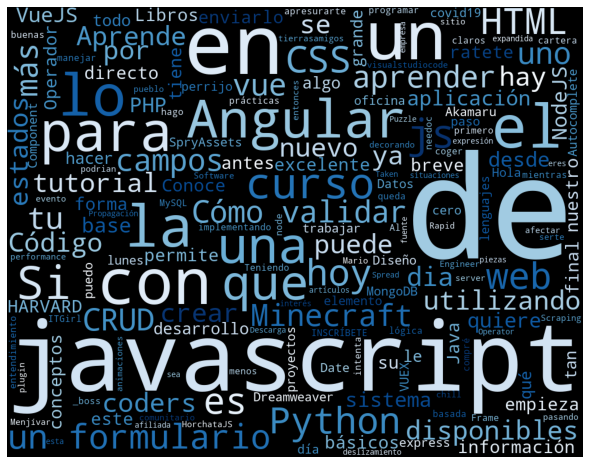

In [ ]:
plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()